In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/content/Airline_Train.csv')  #read file

In [3]:
data  #this all data before drop

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data=data.dropna()

In [5]:
data #all data after drop

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
print(len(data)) #number of rows
print(len(data.columns)) #number of columns

10682
11


In [7]:
new_data=data.drop(columns=['Date_of_Journey','Route','Arrival_Time']) #drop some columns

In [8]:
new_data

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,2h 30m,non-stop,No info,4107
10679,Air India,Kolkata,Banglore,20:45,2h 35m,non-stop,No info,4145
10680,Jet Airways,Banglore,Delhi,08:20,3h,non-stop,No info,7229
10681,Vistara,Banglore,New Delhi,11:30,2h 40m,non-stop,No info,12648


In [9]:
new_data['Duration']=  new_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)  #convert duration from hours to min

In [10]:
new_data

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,22:20,170,non-stop,No info,3897
1,Air India,Kolkata,Banglore,05:50,445,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,09:25,1140,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,18:05,325,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,16:50,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,150,non-stop,No info,4107
10679,Air India,Kolkata,Banglore,20:45,155,non-stop,No info,4145
10680,Jet Airways,Banglore,Delhi,08:20,180,non-stop,No info,7229
10681,Vistara,Banglore,New Delhi,11:30,160,non-stop,No info,12648


In [11]:
print(len(new_data)) #number of row of new_data
print(len(new_data.columns))  #number of columns of new_data

10682
8


In [12]:
new_data.dtypes  #type of data 

Airline            object
Source             object
Destination        object
Dep_Time           object
Duration            int64
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
for col_name in new_data.columns:
    try:
        new_data[col_name] = new_data[col_name].astype('float')
    except:
      continue

In [14]:
for col_name in new_data.columns:
    if new_data[col_name].dtype == 'object':
        new_data = new_data.drop(col_name, axis='columns')

In [15]:
new_data

,Duration,Price
0,170.0,3897.0
1,445.0,7662.0
2,1140.0,13882.0
3,325.0,6218.0
4,285.0,13302.0
...,...,...
10678,150.0,4107.0
10679,155.0,4145.0
10680,180.0,7229.0
10681,160.0,12648.0


In [16]:
new_columns = []
new_columns_names = None

for col_name in new_data.columns:
    if new_data[col_name].dtype == 'object':
        OHB = pd.get_dummies(new_data[col_name], prefix=col_name)
        
        new_columns_names = np.concatenate((new_columns_names, OHB.columns.to_numpy()), axis=None)
        new_columns = np.hstack((new_columns, OHB.to_numpy()))
        
    else:
        if len(new_columns) == 0:
            new_columns = new_data[col_name].to_numpy().reshape(-1, 1)
            new_columns_names = np.array([col_name])
        else:
            new_columns = np.hstack((new_columns, new_data[col_name].to_numpy().reshape(-1, 1)))
            new_columns_names = np.concatenate((new_columns_names, col_name), axis=None)

In [17]:
assert new_columns.shape[1] == len(new_columns_names)

In [18]:
print(len(new_columns_names))
print(new_columns_names)

2
['Duration' 'Price']


In [19]:
# converting the new data back into a dataframe:
new_data = pd.DataFrame(new_columns, columns=new_columns_names)
new_data

,Duration,Price
0,170.0,3897.0
1,445.0,7662.0
2,1140.0,13882.0
3,325.0,6218.0
4,285.0,13302.0
...,...,...
10677,150.0,4107.0
10678,155.0,4145.0
10679,180.0,7229.0
10680,160.0,12648.0


In [20]:
data_size= len(new_data)
print(data_size)
train_size=int(data_size*.8)
test_size=data_size - train_size
print(train_size,test_size)

10682
8545 2137


In [21]:
y_train=new_data['Price']
y_test= new_data['Price']
x_train=new_data.iloc[:,0:-1]
x_test=new_data.iloc[:,0:-1]

In [22]:
#from sklearn.linear_model import LinearRegression #using linear regression to build model y=a0+(a1*x1)+(a2*x2)+(a3*x3)+(a4*x4)+(a5*x5)+(a6*x6)+(a7*x7)+(a8*x8)

In [23]:
lr=LinearRegression()
lr=lr.fit(x_train,y_train)

In [24]:
print('a0 =', lr.intercept_)
for i in range(len(x_train.columns)):
    print('a', i+1, ' = ', lr.coef_[i], '\t-->\t coef. of: ', x_train.columns[i], sep='')     #beacuse tow paramaters are float

a0 = 6129.779225062779
a1 = 4.599286233202631	-->	 coef. of: Duration


In [25]:
from sklearn.metrics import r2_score

In [26]:
Y_pred = lr.predict(x_test)
r2_val = r2_score(y_test, Y_pred)
print('Accuracy of the model = %.2f' % (r2_val * 100), '%', sep='')      # this method has low accuracy 

Accuracy of the model = 25.65%


In [27]:
# decision tree method 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [28]:
new_data

,Duration,Price
0,170.0,3897.0
1,445.0,7662.0
2,1140.0,13882.0
3,325.0,6218.0
4,285.0,13302.0
...,...,...
10677,150.0,4107.0
10678,155.0,4145.0
10679,180.0,7229.0
10680,160.0,12648.0


In [29]:
x=new_data['Duration']
y=new_data['Price']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train = np.expand_dims(x_train, axis=1)
print(x_train.shape)

(8011, 1)


In [31]:
x_test = np.expand_dims(x_test, axis=1)
print(x_test.shape)
print(x_test.dtype)

(2671, 1)
float64


In [32]:
dt = DecisionTreeRegressor()
dt= dt.fit(x_train, y_train)

In [33]:
dt_accuracy = dt.score(x_test, y_test)
print("Accuracy = %.2f" % (dt_accuracy * 100), '%', sep='')

Accuracy = 45.06%


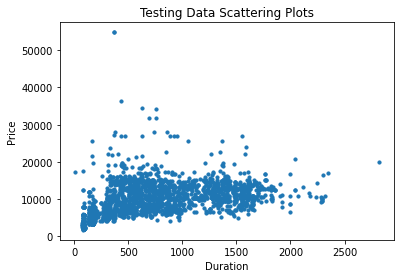

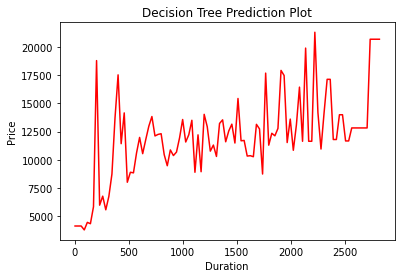

In [34]:
plt.scatter(x_test, y_test, s=10)
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Testing Data Scattering Plots')
plt.show()

x_range = np.linspace(min(x_test), max(x_test), 100)
y_pred = dt.predict(x_range)
plt.plot(x_range, y_pred, color='red')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Decision Tree Prediction Plot')
plt.show()

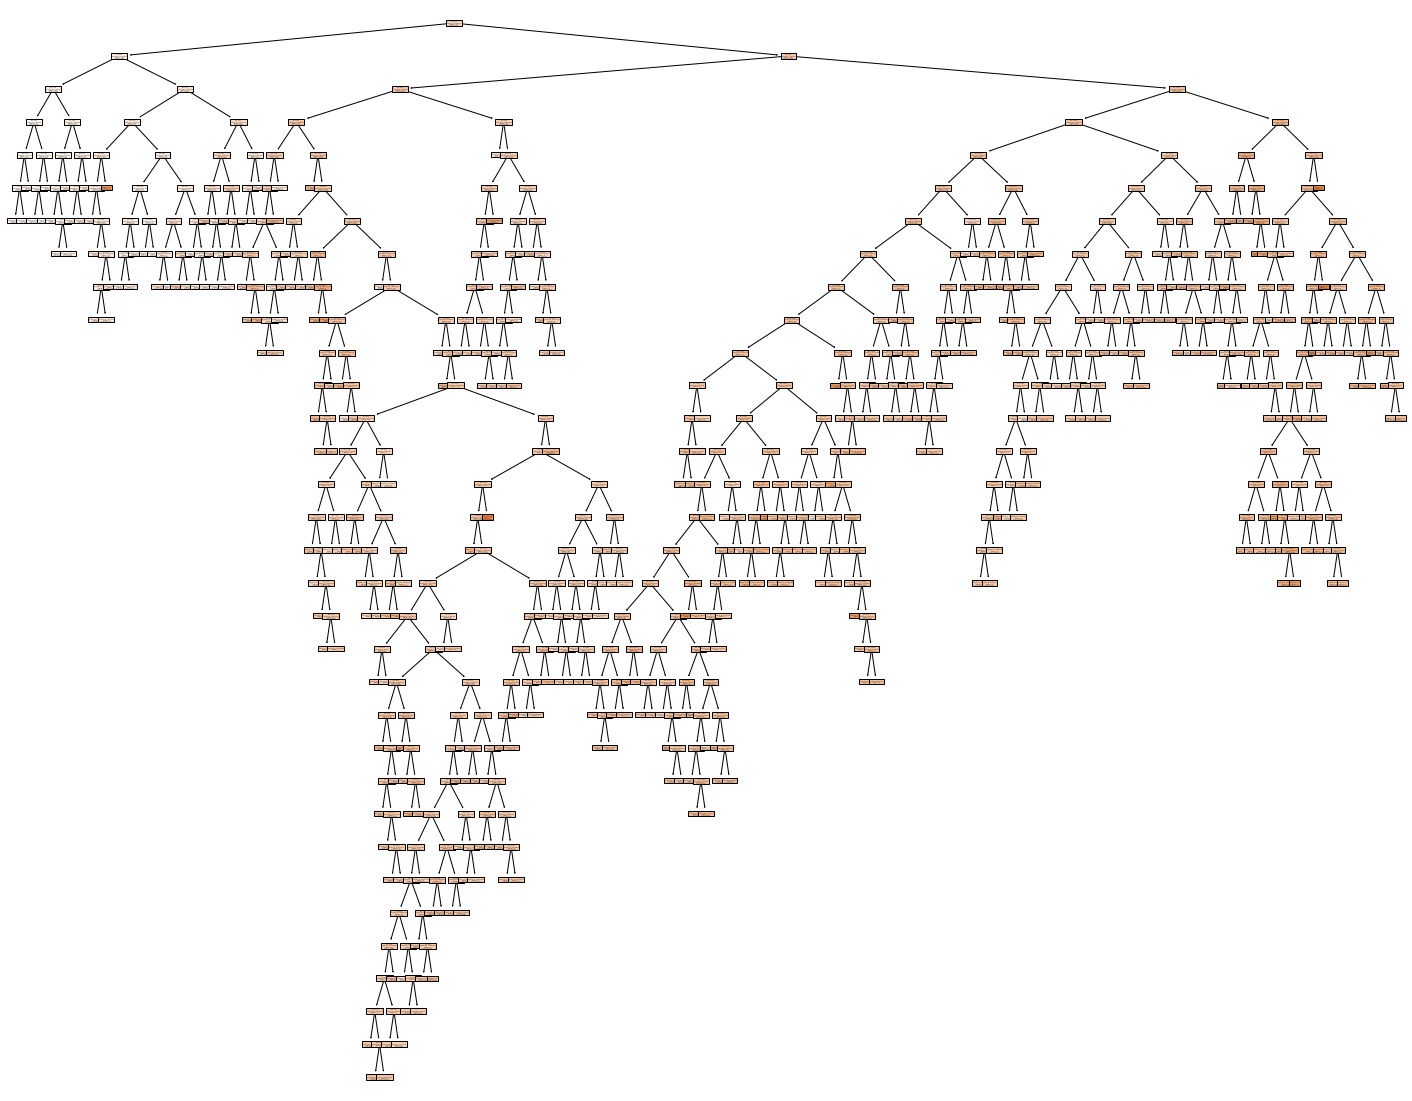

In [35]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
                   feature_names='Duration',  
                   class_names='Price',
                   filled=True)
fig.savefig("decistion_tree3.png")

In [36]:
#RandomForestRegressor method
from sklearn.ensemble import RandomForestRegressor

In [37]:
RF_model = RandomForestRegressor(n_estimators=100)
RF_model = RF_model.fit(x_train, y_train)

In [38]:
RF_accuracy = RF_model.score(x_test, y_test)
print("Accuracy = %.2f" % (RF_accuracy * 100), '%', sep='')

Accuracy = 45.20%


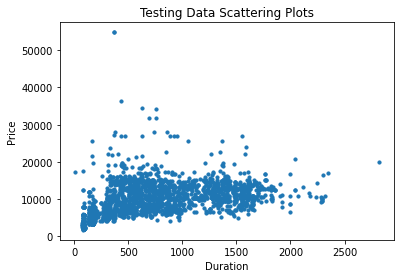

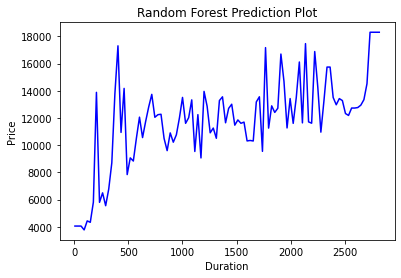

In [39]:
plt.scatter(x_test, y_test, s=10)
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Testing Data Scattering Plots')
plt.show()

x_range = np.linspace(min(x_test), max(x_test), 100)
y_pred = RF_model.predict(x_range)
plt.plot(x_range, y_pred, color='blue')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Random Forest Prediction Plot')
plt.show()

In [40]:
data2=pd.read_csv('/content/Airline_Test.csv')

In [41]:
data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [42]:
data2=data.dropna()

In [43]:
print(len(data)) 
print(len(data.columns))

10682
11


In [45]:
for col_name in new_data.columns:
    try:
        new_data[col_name] = new_data[col_name].astype('float')
    except:
      continue

In [46]:
for col_name in new_data.columns:
    if new_data[col_name].dtype == 'object':
        new_data = new_data.drop(col_name, axis='columns')

In [47]:
new_data2=data.drop(columns=['Date_of_Journey','Route','Arrival_Time'])

In [48]:
new_data2

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,2h 30m,non-stop,No info,4107
10679,Air India,Kolkata,Banglore,20:45,2h 35m,non-stop,No info,4145
10680,Jet Airways,Banglore,Delhi,08:20,3h,non-stop,No info,7229
10681,Vistara,Banglore,New Delhi,11:30,2h 40m,non-stop,No info,12648


In [51]:
new_data2=data.dropna()

In [52]:
new_data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [54]:
new_data2['Duration']=  new_data2['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [55]:
new_data2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,160,non-stop,No info,12648


In [65]:
new_data2=data.drop(columns=['Date_of_Journey','Route','Arrival_Time'])

In [66]:
new_data2

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,2h 30m,non-stop,No info,4107
10679,Air India,Kolkata,Banglore,20:45,2h 35m,non-stop,No info,4145
10680,Jet Airways,Banglore,Delhi,08:20,3h,non-stop,No info,7229
10681,Vistara,Banglore,New Delhi,11:30,2h 40m,non-stop,No info,12648


In [67]:
for col_name in new_data.columns:
    try:
        new_data2[col_name] = new_data2[col_name].astype('float')
    except:
      continue

In [69]:
for col_name in new_data2.columns:
    if new_data2[col_name].dtype == 'object':
        new_data2 = new_data2.drop(col_name, axis='columns')

In [70]:
new_data2

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0
...,...
10678,4107.0
10679,4145.0
10680,7229.0
10681,12648.0


In [72]:
ypred = dt.predict(new_data2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
